Problem 6

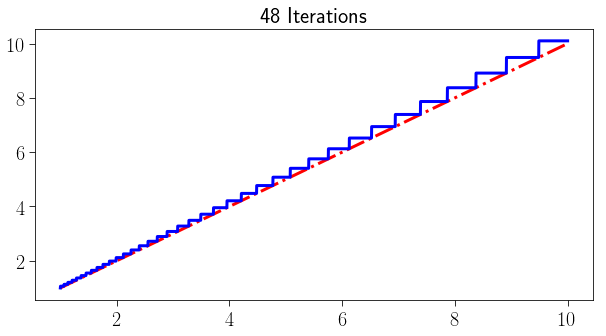

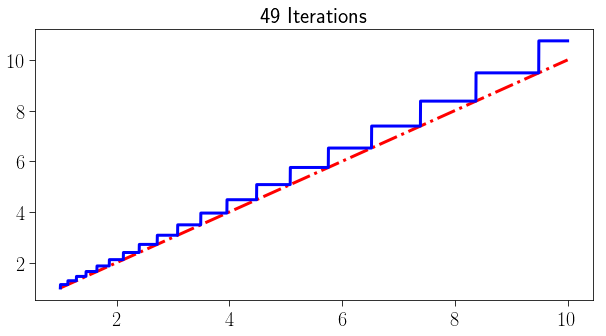

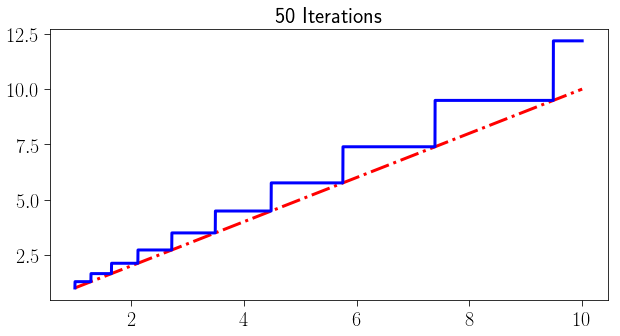

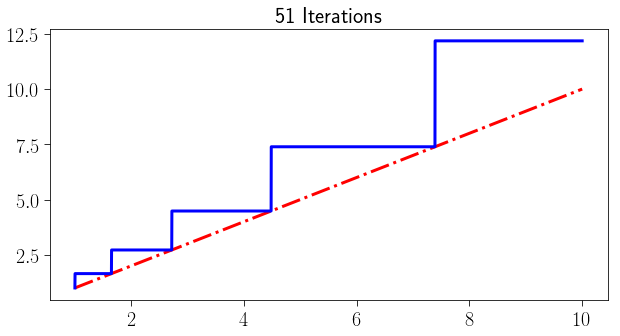

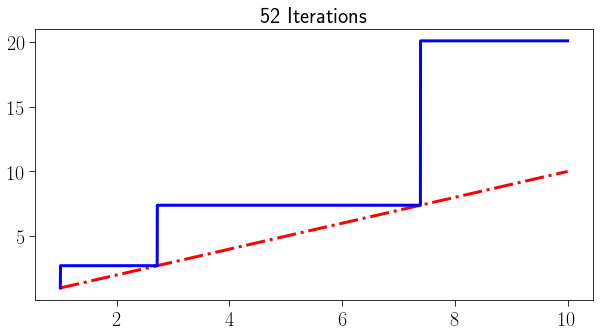

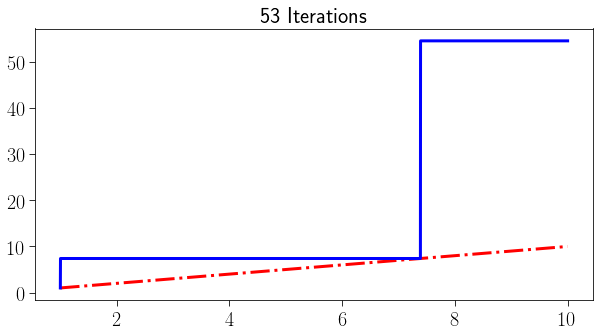

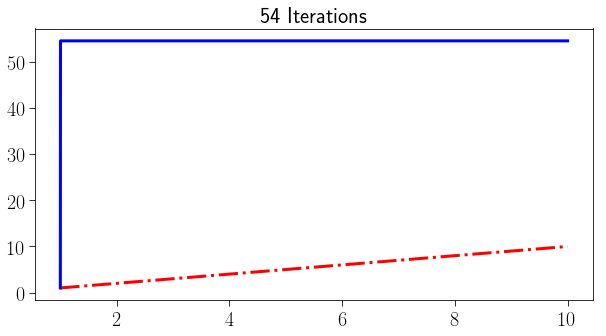

In [5]:

import numpy as np
import matplotlib.pyplot as plt
import sys



npoints=10001
nplots=7
counter=0
iterations=np.linspace(48, 48+nplots-1, nplots, dtype=int)
x = np.linspace(1,10,npoints)
y = np.zeros((nplots, npoints))
for its in iterations:
    ytemp = np.linspace(1,10,npoints)

    for ind in range(its):
        ytemp = np.sqrt(ytemp)

    for ind in range(its):
        ytemp = np.square(ytemp)
    
    y[counter, :]=ytemp
    counter=counter+1
    
for its in range(nplots):
    plt.figure(figsize=(10,5))
    plt.plot(x, x, '-.r')    
    plt.plot(x, y[its, :], '-b')
    plt.title('{} Iterations'.format(iterations[its]))





In [2]:
epsilon=sys.float_info.epsilon
print('machine epsilon is {}, which = 2^-52'.format(epsilon))
iterations[4]
print('first plateau for 52 iterations is {}=e'.format(y[4, 1]))
min_number=1+epsilon
print('Note that (1+epsilon)^2^52={}'.format(min_number**(2**52)))
inde=(np.abs(x - y[4, 1])).argmin() #index of x=e
print('x and y agree at x={:.6}=> y({:.6})={:.6}'.format(x[inde], x[inde],y[4, inde]))
print('next point is start of next plateau y({:.6})={:.6}=e^2'.format(x[inde+1],y[4, inde+1]))

machine epsilon is 2.220446049250313e-16, which = 2^-52
first plateau for 52 iterations is 2.718281808182473=e
Note that (1+epsilon)^2^52=2.718281828459045
x and y agree at x=2.7181=> y(2.7181)=2.71828
next point is start of next plateau y(2.719)=7.38906=e^2


When computing $(\cdots(x^{1/2})^{1/2}\cdots)^{1/2}=x^{{1/2}^n}=x^{2^{-n}}$, xs differing by less than $\epsilon=2^{-52}$ will be rounded to a common value.  In particular, a window of numbers closest to 1 (varies depending on $n$ will be mapped to $1+\epsilon$, the smallest binary number larger than 1.  We then compute  $(\cdots((1+\epsilon^{2})^{2}\cdots)^{2}=(1+\epsilon)^{{2}^n}$, resulting in a plateau at finite number. 

Similarly, there is a set of numbers $1+\epsilon<x^{2^{-n}}<1+2\epsilon$ map to $1+2\epsilon$ when the repeated roots are taken, resulting in the next plateau at the larger finite number $(1+2\epsilon)^{{2}^n}$, and this repeats, resulting in the series of $m$ plateaus at $(1+m\epsilon)^{{2}^n}$.  Note that right at the end of each plateau we have $y=x$ (ie the repeated roots gives the correct number), since this is when $x^{2^{-n}}=1+m\epsilon$ and there is no rounding so repeated squaring returns the original number. The plateaus grow in width with increasing $n$ since $2^{-n}$ becomes smaller and thus a wider range of x are within $\epsilon$ when $x^{2^{-n}}$ is calculated

Looking at the plot for 52 iterations, we see that the first plateau has an amplitude of $e=(1+\epsilon^{{2}^{52}}$ (see code above), and then y jumps once x>e to $(1+2\epsilon)^{{2}^52}=$(1+\epsilon)^{{2}^{53}}=e^2.  It can be quickly numerically verified that this pattern continues, with $y=e^m$ for $e^{m-1}<x\leq e^m$


In [3]:
print('first plateau for 53 iterations is {:.6}=e^2=(1+epsilon)^2^53={:.6}'.format(y[5, 1], min_number**(2**53)))
inde2=(np.abs(x - y[5, 1])).argmin() -1#index of x=e
print('x and y agree at x={:.6}=> y({:.6})={:.6}'.format(x[inde2], x[inde2],y[5, inde2]))
print('next point is start of next plateau y({:.6})={:.6}=e^4'.format(x[inde2+1],y[5, inde2+1]))
# np.exp(1)**4

first plateau for 53 iterations is 7.38906=e^2=(1+epsilon)^2^53=7.38906
x and y agree at x=7.3882=> y(7.3882)=7.38906
next point is start of next plateau y(7.3891)=54.5981=e^4


Moving on to 53 iterations, we see that the first plateau has an amplitude of $e^2=(1+\epsilon)^{{2}^{53}}$ as expected, with plateaus $y=e^{2m}$ for $e^{2(m-1)}<x\leq e^{2m}$

Similarly for 52 iterations, we have the first plateau of $e^{1/2}=(1+\epsilon)^{{2}^{51}}$ and plateaus of $y=e^{m/2}$ for $(e^{(m-1)/2}<x\leq e^{m/2}$. (numerically below)

In [4]:
print('first plateau for 51 iterations is {:.6}=e^2=(1+epsilon)^2^51={:.6}'.format(y[3, 1], min_number**(2**51)))
inde3=(np.abs(x - y[3, 1])).argmin() -1#index of x=e
print('x and y agree at x={:.6}=> y({:.6})={:.6}'.format(x[inde2], x[inde3],y[3, inde3]))
print('next point is start of next plateau y({:.6})={:.6}=e'.format(x[inde3+1],y[3, inde3+1]))
# np.exp(1)**0.5

first plateau for 51 iterations is 1.64872=e^2=(1+epsilon)^2^51=1.64872
x and y agree at x=7.3882=> y(1.648)=1.64872
next point is start of next plateau y(1.6489)=2.71828=e


The general pattern can thus be described as follows (and verified via the same methods as above, or using plots):
For $n$ iterations, there are plateaus of $y=exp(m*2^{n-52})$ for $y=exp((m-1)*2^{n-52})<x<exp(m*2^{n-52})$